In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
m = 20  # no of samples
X = np.random.rand(3,m)
Y = np.random.rand(1,m)

In [4]:
alpha = 0.1 # learning rate

# units in each layer
# first number (3) is input dimension
units = [3, 4, 4, 4, 4, 3, 1]

# Total layers
L = len(units) - 1

In [5]:
# parameter dictionary
parameters = dict()

In [6]:
for layer in range(1, L+1):
    parameters['W' + str(layer)] = np.random.rand(units[layer],units[layer-1])
    parameters['b' + str(layer)] = np.zeros((units[layer],1))

In [7]:
def sigmoid(X):
    return 1 / (1 + np.exp(- X))

def inv_sigmoid(X):
    return sigmoid(X) * (1-sigmoid(X))

In [8]:
cache = dict()
cache['a0'] = X

epochs = 100

In [9]:
def forward_pass():
  for layer in range(1, L+1):
    cache['Z' + str(layer)] = np.dot(parameters['W' + str(layer)],cache['a' + str(layer-1)]) + parameters['b' + str(layer)]
    cache['a' + str(layer)] = sigmoid(cache['Z' + str(layer)])

In [10]:
def backward_pass():
  y_hat = cache['a' + str(L)]
  cost = np.sum(-(1/m) * (Y*np.log(y_hat)+(1-Y)*np.log(1-y_hat)))
  costs.append(cost)

  cache['dZ' + str(L)] = (1/m) * (y_hat - Y)
  cache['dW' + str(L)] = np.dot(cache['dZ' + str(L)], cache['a' + str(L-1)].T)
  cache['db' + str(L)] = np.sum(cache['dZ' + str(L)], axis=1, keepdims=True)

  for layer in range(L-1,0,-1):
      cache['dZ' + str(layer)] = np.dot(parameters['W' + str(layer+1)].T, cache['dZ' + str(layer+1)]) * inv_sigmoid(cache['Z' + str(layer)])
      cache['dW' + str(layer)] = np.dot(cache['dZ' + str(layer)], cache['a' + str(layer-1)].T)
      cache['db' + str(layer)] = np.sum(cache['dZ' + str(layer)], axis=1, keepdims=True)

In [11]:
def update_weights():
  for layer in range(1, L+1):
      parameters['W' + str(layer)] = parameters['W' + str(layer)] - alpha * cache['dW' + str(layer)]
      parameters['b' + str(layer)] = parameters['b' + str(layer)] - alpha * cache['db' + str(layer)]

In [12]:
costs = []
for epoch in range(epochs):
    forward_pass()
    
    backward_pass()

    update_weights()

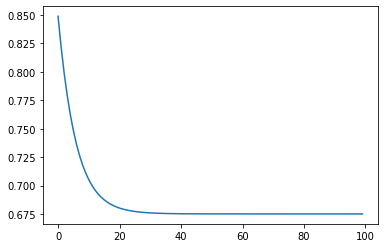

In [13]:
plt.plot(costs)